# Sentiment Analysis for Restaurant Reviews

In this work, we are going to do analysis of Restaurant reviews: positive or negative reviews, using NLP techniques.
The dataset we are using contains 1000 samples with their corresponding labels: 0 for negative review and 1 for positive review.
These are the different steps in our work:


        1- Data Preprocessing
        2- Split the dataset into train and test
        3- Fit a linear model

In [1]:
# import some libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#get the dataset
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t")
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Look at the repartition of the dataset, how many 1 and 0? missing data?
This might be very useful so that we can know which kind one preprocessing we need to do

Number of positive reviews:  500
Number of the negative reviews:  500
Missing data:  0


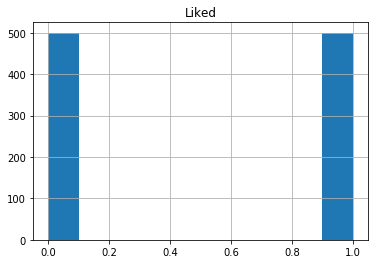

In [3]:
print("Number of positive reviews: ",sum(dataset["Liked"]==1))
print("Number of the negative reviews: ", sum(dataset["Liked"]==0))
print("Missing data: ", dataset.isnull().sum().sum())

#plt.figure(figsize=[10,7])
#plt.subplot(1,3,1)
#dataset["Liked"].value_counts().plot.pie()
dataset.hist()
#plt.subplot(1,4,1)
#dataset["Review"].value_counts().plot.pie()
plt.show()

# 1- Data Preprocessing

First, we will set all the words into lower case, clean the data by removing the punctuations and the numbers and transform all reviews words by lemmatization technique.
Why is this preprocessing important?

    a- We set all the words to lower case so that we will not have a distinction between, "NICE" and "nice" for instance
    
    b- Punctuations and numbers are not needed here because they don't discriminate the data
    
    c- Lemmatization is a technique called "Word Normalization": it is a way to truncate words to keep the canonical form or the dictionary form. Then all the words in the dataset having the same normalization will share the same feature. This technique is similar to Stemming but the difference is Stemming keep only the root of the word. For instance, if we have the sentence "We use scientific methods in data science", the output after stemming would be " we use scientif method in data scienc", and the output after lemmatization will be "we use scientifique method in data science."

In [4]:
import nltk
import re
#nltk.download() #decomment it if you have not installed yet this corpus
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [5]:
print("\t Lemmatization")
l = WordNetLemmatizer()
s = "We use scientific methods in data science "
for word in s.split():
    if not word in set(stopwords.words('english')):
        print(l.lemmatize(word))
print("\t Stemming")
ps = PorterStemmer()
for word in s.split():
    if not word in set(stopwords.words('english')):
        print(ps.stem(word))

	 Lemmatization
We
use
scientific
method
data
science
	 Stemming
We
use
scientif
method
data
scienc


In [6]:
# Initialize empty array 
# to append clean text  
corpus = []  
# 1000 (reviews) rows to clean 
for i in range(0, 1000):      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  # it replaces everything that it not alphabetic character by a space
    review = review.lower()  # convert all cases to lower cases    
    review = review.split()  # split to array(default delimiter is " ")     
    # creating Lemmatizer object to 
    # take main stem of each word 
    lemmatizer = WordNetLemmatizer()     
    # loop for lemmatization each word 
    # in string array at ith row     
    review = [lemmatizer.lemmatize(word) for word in review 
                if not word in set(stopwords.words('english'))]                  
    # rejoin all string array elements 
    # to create back into a string 
    rev = ' '.join(review)       
    # append each string to create 
    # array of clean text  
    corpus.append(rev)  

In [7]:
corpus[0]

'wow loved place'

Here we can visualize some of the transformation done on the dataset by the preprocessing.

In [8]:
print("\t\t Initial Dataset")
print(dataset['Review'][:5],"\n")
print("\t\t After preprocessing")
print(corpus[:5])

		 Initial Dataset
0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object 

		 After preprocessing
['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price']


The next step will be to create our feature matrix where every review will be represented as a sparse vector: this is a Bag Of Words (BOW) representations. For that task, we need CountVectorizer from sklearn.feature_extraction.text.
In this CountVectorizer class we can set the maximum number of features (max no. features which help the most via attribute “max_features”). Do the training on corpus and then apply the same transformation to the corpus “.fit_transform(corpus)” and then convert it into array. If review is positive or negative that answer is in second column of : dataset[:, 1] : all rows ans 1st column (indexing from zero).



In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features = 1500)
word2vec = count_vect.fit_transform(corpus).toarray() #create a matrix where all the reviews(after transformation) are stored with their vector representation
true_labels = dataset.iloc[:,1] # get all the labels from our dataset

In [10]:
word2vec.shape
word2vec[0]
#print(sum(word2vec[0]==1))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 2- Training and test

Since this is the only dataset available, we will split it into two parts: a training part and a testing part using train_test_split from sklearn.cross_validation

In [11]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(word2vec, true_labels, test_size = .3, random_state = 42)

# 3- Fitting a model

Since we are doing binary classification, we can fit a Logistic Regression model.

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, Y_train)
pred_labels = clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred_labels))
print("Confusion Matrix: ", confusion_matrix(y_test, pred_labels))

Accuracy:  0.793333333333
Confusion Matrix:  [[126  26]
 [ 36 112]]
